# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [66]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [67]:
sinasc.APGAR5.unique()

array([10.,  9.,  7.,  0.,  8.,  4.,  3.,  6.,  5., nan,  2.,  1.])

In [68]:
sinasc.loc[(sinasc['APGAR5'] > 0) & (sinasc['APGAR5'] < 4), 'APGAR5_Cat'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] < 6), 'APGAR5_Cat'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] < 8), 'APGAR5_Cat'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'APGAR5_Cat'] = 'condição normal'

In [69]:
sinasc['APGAR5_Cat'].head()

,APGAR5_Cat
0,condição normal
1,condição normal
2,condição normal
3,condição normal
4,condição normal


In [70]:
sinasc.APGAR5_Cat.unique()

array(['condição normal', 'asfixia leve', nan, 'asfixia moderada',
       'asfixia grave'], dtype=object)

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

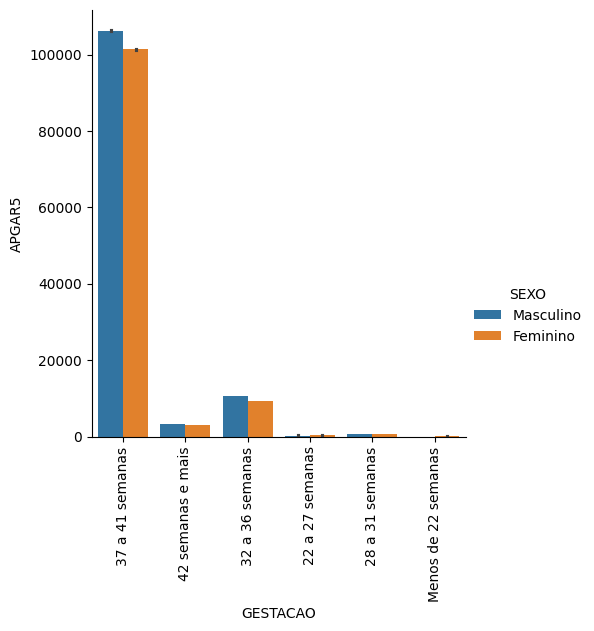

In [80]:
catplot = sns.catplot(x='GESTACAO',
            y='APGAR5',
            hue = 'SEXO',
            kind= 'bar',
            estimator = sum,
            data=sinasc)

catplot.set_xticklabels(rotation=90)


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [83]:
freq = pd.crosstab(sinasc['GESTACAO'], columns=sinasc['APGAR5_Cat'])
freq

APGAR5_Cat,asfixia grave,asfixia leve,asfixia moderada,condição normal
GESTACAO,,,,
22 a 27 semanas,14,12,1,51
28 a 31 semanas,3,18,12,129
32 a 36 semanas,6,73,19,2134
37 a 41 semanas,28,196,28,22266
42 semanas e mais,0,6,1,690
Menos de 22 semanas,1,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [84]:
freq.sum(axis=1)

,0
GESTACAO,
22 a 27 semanas,78
28 a 31 semanas,162
32 a 36 semanas,2232
37 a 41 semanas,22518
42 semanas e mais,697
Menos de 22 semanas,6


In [85]:
freq_pctlin = freq.div(freq.sum(axis=1), axis = 0)
freq_pctlin

APGAR5_Cat,asfixia grave,asfixia leve,asfixia moderada,condição normal
GESTACAO,,,,
22 a 27 semanas,0.179487,0.153846,0.012821,0.653846
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.002688,0.032706,0.008513,0.956093
37 a 41 semanas,0.001243,0.008704,0.001243,0.988809
42 semanas e mais,0.000000,0.008608,0.001435,0.989957
Menos de 22 semanas,0.166667,0.166667,0.000000,0.666667


In [86]:
freq_pctlin.sum(axis=1)

,0
GESTACAO,
22 a 27 semanas,1.0
28 a 31 semanas,1.0
32 a 36 semanas,1.0
37 a 41 semanas,1.0
42 semanas e mais,1.0
Menos de 22 semanas,1.0


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

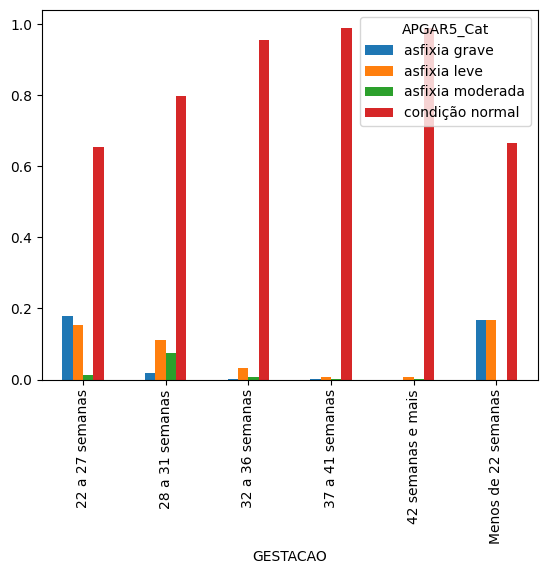

In [89]:
freq_pctlin.plot.bar()

Os valores que possuem mais presença de asfixia seriam
* Menos de 22 semanas
* 22 a a 27 semanas
* 28 a 31 semanas
* 32 a 36 semanas

Mas os valores que expressam numeros significatico de nascimentos com asfixia seriam os 3 primeiros, ou seja, até 31 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

Vamos primeiro visualizar a distribuição de APGAR5 por PESO

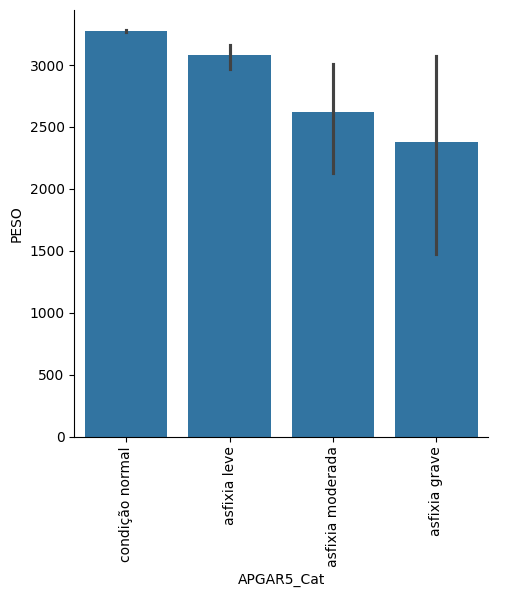

In [111]:
catplot = sns.catplot(x='APGAR5_Cat',
            y='PESO',
            kind= 'bar',
            estimator = 'median',
            data=sinasc)

catplot.set_xticklabels(rotation=90)

Boxplot com covariáveis.

<Axes: xlabel='APGAR5_Cat', ylabel='PESO'>

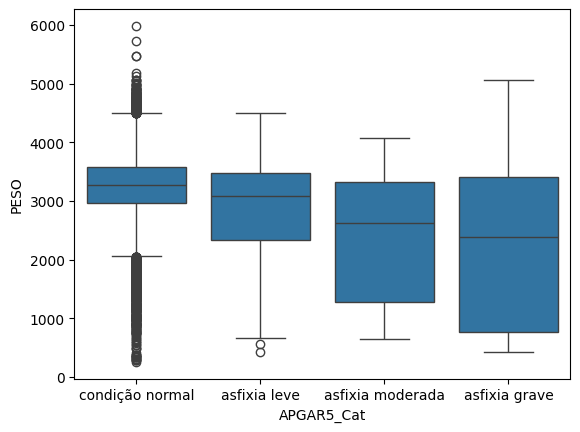

In [94]:
sns.boxplot(x='APGAR5_Cat', y ='PESO', data = sinasc, orient='v')

Percebe-se que quanto menor o peso ao nascer maior a chance asfixia.